In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
import pymongo



In [2]:
# Conectar ao MongoDB
client = pymongo.MongoClient("mongodb://localhost:27017/")

# Selecionar o banco de dados e a coleção
db = client["dnc"]
collection = db["weather"]

In [3]:
# Buscar todos os documentos da coleção
data = list(collection.find())

# Converter as strings de data e hora para objetos datetime
for record in data:
    record['dt'] = datetime.strptime(record['dt'], "%Y-%m-%d %H:%M:%S")
    record['sunrise'] = datetime.strptime(record['sunrise'], "%Y-%m-%d %H:%M:%S")
    record['sunset'] = datetime.strptime(record['sunset'], "%Y-%m-%d %H:%M:%S")

# Converter os documentos em um DataFrame
df = pd.DataFrame(data)

# Mostrar o DataFrame
df.head()

,_id,hashId,city,clouds_all,country,dt,feels_like,humidity,pressure,sunrise,sunset,temp_max,temp_min,temperature,visibility,weather_description,weather_main,wind_deg,wind_speed
0,666bca77cd1b55a3bff4744b,f16892124ed034dff2021af7fa937508,São José dos Campos,0,BR,2024-06-14 04:40:53,287.04,82,1021,2024-06-14 09:42:28,2024-06-14 20:25:29,287.42,287.42,287.42,10000,clear sky,Clear,0,0.51
1,666bca77cd1b55a3bff4744d,2bb6aca983b15f1ce56e550669072893,Rio de Janeiro,0,BR,2024-06-14 04:40:50,295.42,78,1017,2024-06-14 09:31:11,2024-06-14 20:15:20,295.13,291.15,295.13,10000,clear sky,Clear,330,2.57
2,666bca77cd1b55a3bff4744f,8957ce98fbaae0e082e6a0e166e0b567,Brasília,20,BR,2024-06-14 04:40:22,290.48,77,1022,2024-06-14 09:36:19,2024-06-14 20:47:59,290.66,287.38,290.66,10000,few clouds,Clouds,90,2.06
3,666bca77cd1b55a3bff47451,0fac51b60169e38d32f89b7a346fbaf7,Curitiba,0,BR,2024-06-14 04:39:23,286.94,67,1018,2024-06-14 10:00:55,2024-06-14 20:34:17,289.63,284.50,287.68,10000,clear sky,Clear,30,2.06


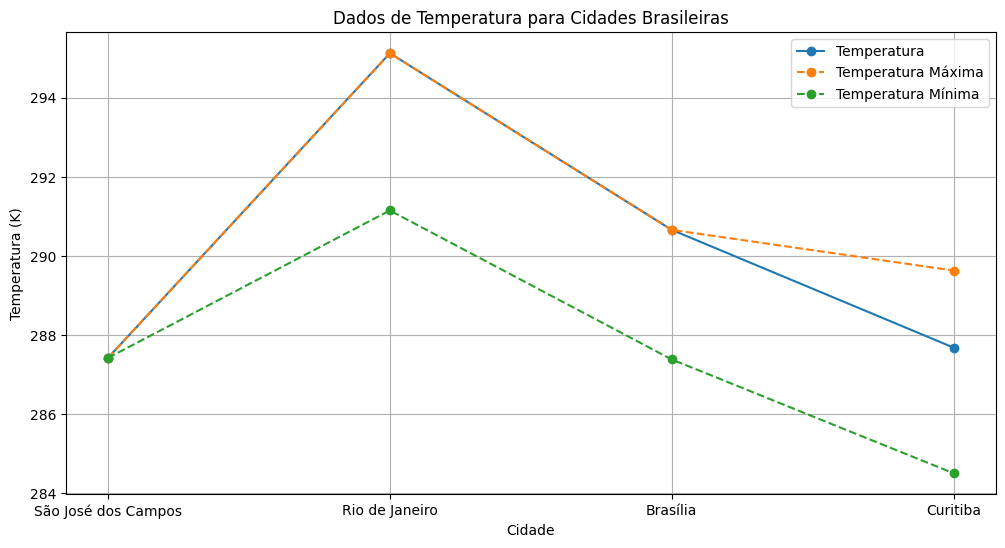

In [4]:
# Plotar dados de temperatura
plt.figure(figsize=(12, 6))
plt.plot(df['city'], df['temperature'], marker='o', label='Temperatura')
plt.plot(df['city'], df['temp_max'], marker='o', linestyle='--', label='Temperatura Máxima')
plt.plot(df['city'], df['temp_min'], marker='o', linestyle='--', label='Temperatura Mínima')
plt.title('Dados de Temperatura para Cidades Brasileiras')
plt.xlabel('Cidade')
plt.ylabel('Temperatura (K)')
plt.legend()
plt.grid(True)
plt.show()

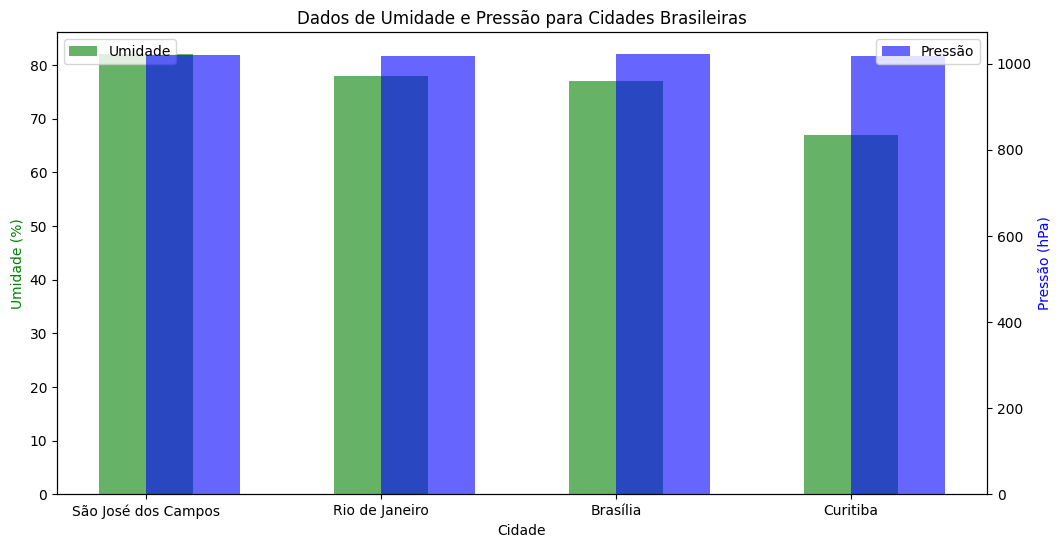

In [5]:
# Plotar dados de umidade e pressão
fig, ax1 = plt.subplots(figsize=(12, 6))

ax2 = ax1.twinx()
ax1.bar(df['city'], df['humidity'], color='g', alpha=0.6, width=0.4, align='center', label='Umidade')
ax2.bar(df['city'], df['pressure'], color='b', alpha=0.6, width=0.4, align='edge', label='Pressão')

ax1.set_xlabel('Cidade')
ax1.set_ylabel('Umidade (%)', color='g')
ax2.set_ylabel('Pressão (hPa)', color='b')
plt.title('Dados de Umidade e Pressão para Cidades Brasileiras')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

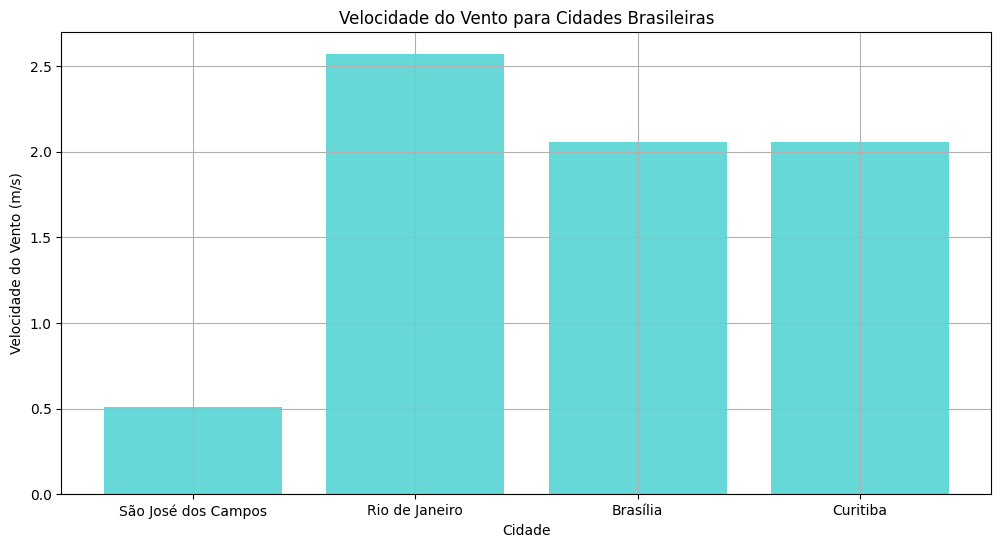

In [6]:
# Plotar dados de velocidade do vento
plt.figure(figsize=(12, 6))
plt.bar(df['city'], df['wind_speed'], color='c', alpha=0.6)
plt.title('Velocidade do Vento para Cidades Brasileiras')
plt.xlabel('Cidade')
plt.ylabel('Velocidade do Vento (m/s)')
plt.grid(True)
plt.show()